In [1]:
# Objective

## The company wants to understand the driving factors (or driver variables) behind loan default (loan_status = 'Charged Off'), 
## i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

In [2]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.core.display import HTML
%matplotlib inline
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored

In [3]:
#since we already created one local copy, we can start working on actual data for our Analysis
loan= pd.read_csv(r"/Users/kumar/Downloads/loan.csv")

In [4]:
# exploring the data using various parameters.
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
loan.shape

(39717, 111)

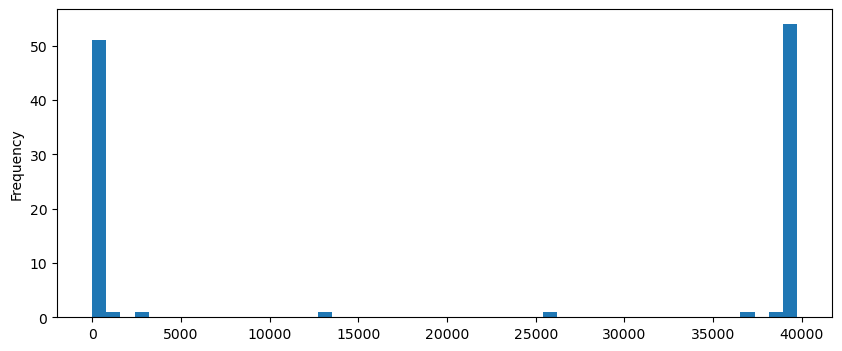

In [7]:
#as we see some columns have missing values and unique values, let see explore more to keep or drop them
#Let us do some cleanup of NULLs from rows and columns of the loan dataframe
c = loan.isnull().sum()
c.plot(kind='hist', bins=50, figsize = (10,4))
plt.show()

In [8]:
# In the above figure, X-axis contains number of NULL values and Y-axis contains number of columns. 
# We can clearly see that there is a huge spike towards the 40K mark. The total records in our data is 39,717. 
# We would obviously not need the columns that have all NULLs. 
# Also, we see there are few columns above 10K mark, but let us analyze those before dropping.

In [9]:
c.loc[(c.values > 10000) & (c.values < 39717)].sort_values()

desc                      12942
mths_since_last_delinq    25682
mths_since_last_record    36931
next_pymnt_d              38577
dtype: int64

In [10]:
# Let us drop all columns having above 10K NULL values in them.

In [11]:
loan.drop(columns=list(c[c.values > 10000].index), inplace=True)
loan.shape

(39717, 53)

In [12]:
# so we dropped those columns with missing data

In [13]:
r = loan.isnull().sum(axis=1) / len(loan.columns)
max(r.values)

0.09433962264150944

In [14]:
## Let us see if there are any columns with unique or single values in them.

In [15]:
column_unique = loan.nunique()
print(column_unique)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

In [16]:
c1 = column_unique[column_unique.values == 1]
c1.index

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [17]:
loan.drop(columns = list(c1.index), inplace=True)
loan.shape

(39717, 44)

In [18]:
del_cols = ["id","member_id","url","zip_code","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"]
loan.drop(columns=del_cols, inplace=True)
loan.shape

(39717, 28)

In [19]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_title             37258 non-null  object 
 9   emp_length            38642 non-null  object 
 10  home_ownership        39717 non-null  object 
 11  annual_inc            39717 non-null  float64
 12  verification_status   39717 non-null  object 
 13  issue_d               39717 non-null  object 
 14  loan_status           39717 non-null  object 
 15  purpose            

In [20]:
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,pub_rec_bankruptcies
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,0.043260
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,0.204324
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,2.000000


In [21]:
### Data preparation 
let us start with loan status columns to begin with

SyntaxError: invalid syntax (4235029758.py, line 2)

In [ ]:
loan['loan_status'].value_counts()

In [ ]:
# Since loan status "Current" doesnt give any info for our analysis for approving or rejecting application, so dropping this data makes sense

In [ ]:
loan = loan[~(loan['loan_status'] == 'Current')]
loan.shape

In [ ]:
# Let us look at other columns for our analysis... take term and see how it can infulence our decision manking..

In [ ]:
loan['term'].value_counts()

In [ ]:
loan['int_rate'].head()

In [ ]:
# Let's remove %
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [ ]:
loan['int_rate']

In [ ]:
loan['int_rate'].describe()

In [ ]:
loan['int_rate'].plot.box()

In [ ]:
# we can see some outlier values in int_rate column which needs to analysed when we do univariate analysis

In [ ]:
loan['grade'].value_counts()

In [ ]:
loan['sub_grade'].value_counts()

In [23]:
print(loan['emp_title'].value_counts().head())
print(loan['emp_title'].unique().shape)

emp_title
US Army              134
Bank of America      109
IBM                   66
AT&T                  59
Kaiser Permanente     56
Name: count, dtype: int64
(28821,)


In [25]:
loan['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [27]:
loan['emp_length'].isnull().sum()

1075

In [29]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [31]:
loan['home_ownership'].value_counts()

home_ownership
RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: count, dtype: int64

In [53]:
loan['verification_status'].value_counts()

verification_status
Not Verified       16921
Verified           12809
Source Verified     9987
Name: count, dtype: int64

In [65]:
loan['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
4    Dec-11
Name: issue_d, dtype: object

In [ ]:
let's split the month and year

In [39]:
#loan['issue_d'].str.split('-')

0        [Dec, 11]
1        [Dec, 11]
2        [Dec, 11]
3        [Dec, 11]
4        [Dec, 11]
           ...    
39712    [Jul, 07]
39713    [Jul, 07]
39714    [Jul, 07]
39715    [Jul, 07]
39716    [Jun, 07]
Name: issue_d, Length: 39717, dtype: object

In [73]:
loan[['m', 'y']] = loan['issue_d'].str.split('-', expand=True)

In [75]:
loan['y'].value_counts()

y
11    21656
10    11532
09     4716
08     1562
07      251
Name: count, dtype: int64

In [77]:
loan['m'].value_counts()

m
Dec    4433
Nov    4167
Oct    3934
Sep    3648
Aug    3518
Jul    3476
Jun    3279
May    2999
Apr    2834
Mar    2692
Jan    2379
Feb    2358
Name: count, dtype: int64

In [ ]:
let us add new column like issued_year and issued_month which will be useful for our further analysis and drop this issue_d column

In [83]:
loan['issue_y'] = pd.to_numeric(loan['y'])
loan['issue_m'] = loan['m']
loan.drop(columns=['issue_d'], inplace=True)

In [85]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,m,y,issue_y,issue_m
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,3,0,13648,83.70%,9,0.0,Dec,11,11,Dec
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,3,0,1687,9.40%,4,0.0,Dec,11,11,Dec
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,2,0,2956,98.50%,10,0.0,Dec,11,11,Dec
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,10,0,5598,21%,37,0.0,Dec,11,11,Dec
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,15,0,27783,53.90%,38,0.0,Dec,11,11,Dec


In [87]:
loan['purpose'].value_counts()

purpose
debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: count, dtype: int64

In [89]:
len(loan['title'].value_counts())

19615

In [91]:
loan['title'].head(10)

0                                 Computer
1                                     bike
2                     real estate business
3                                 personel
4                                 Personal
5    My wedding loan I promise to pay back
6                                     Loan
7                          Car Downpayment
8     Expand Business & Buy Debt Portfolio
9              Building my credit history.
Name: title, dtype: object

In [93]:
loan['title'].sample(10)

14818                       Personal Loan 
2225                Personal consolidation
22706                       major purchase
1047                         consolidation
23023                insulation contractor
14709                     Consolidate Debt
38021    Covering gap in wedding expenses.
25321                             personal
946                     CREDIT CARD PAYOFF
18987                                 Bike
Name: title, dtype: object

In [97]:
loan['title'].describe()

count                  39706
unique                 19615
top       Debt Consolidation
freq                    2184
Name: title, dtype: object

In [ ]:
since title column has too many unique values... let us drop this column as it may not be useful to keep it 

In [99]:
loan.drop(columns=['title'], inplace=True)

In [101]:
loan['addr_state'].value_counts()

addr_state
CA    7099
NY    3812
FL    2866
TX    2727
NJ    1850
IL    1525
PA    1517
VA    1407
GA    1398
MA    1340
OH    1223
MD    1049
AZ     879
WA     840
CO     792
NC     788
CT     751
MI     720
MO     686
MN     615
NV     497
SC     472
WI     460
AL     452
OR     451
LA     436
KY     325
OK     299
KS     271
UT     258
AR     245
DC     214
RI     198
NM     189
WV     177
HI     174
NH     171
DE     114
MT      85
WY      83
AK      80
SD      64
VT      54
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: count, dtype: int64

In [103]:
loan['earliest_cr_line'].value_counts()

earliest_cr_line
Nov-98    370
Oct-99    366
Dec-98    348
Oct-00    346
Dec-97    329
         ... 
Feb-66      1
Dec-61      1
Oct-54      1
Jun-72      1
Oct-74      1
Name: count, Length: 526, dtype: int64

In [107]:
# Split the 'earliest_cr_line' column into two new columns 'm' and 'y'
loan[['m', 'y']] = loan['earliest_cr_line'].str.split('-', expand=True)

In [113]:
# Count the occurrences of each value in the 'y' column
loan['y'].value_counts()

y
00    3250
99    2968
98    2851
01    2521
97    2456
96    2274
95    2150
94    2027
02    1927
03    1856
04    1761
93    1514
05    1493
06    1169
92    1063
90    1038
91     980
89     861
88     740
07     712
87     618
86     500
85     461
84     409
83     338
82     224
81     187
80     180
79     165
78     165
08     159
77     115
76      97
75      83
73      66
74      65
72      53
70      48
71      46
69      37
68      20
67      18
66      11
63      10
64       9
65       9
62       5
54       2
61       2
59       1
56       1
46       1
50       1
Name: count, dtype: int64

In [117]:
# In the earliest_cr_line field, we do see some data format inconsistencies. 
# Sometimes it has MMM-YY and at other times it has YY-MMM. 
# Also, the year is a 2 digit and not Y2K corrected. 
#Therefre, we would need to apply some logic to extract meaningful data from here

In [119]:
from datetime import datetime
today = datetime.today()
today.year

2024

In [121]:
def days_from_earliest_cr_line (d):
    m, y = d.split('-')
    if y in ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']:
        y, m = d.split('-')
    y = 2000 + int(y)
    if y > today.year:
        y -= 100
    earliest_cr_line = datetime.strptime(str(y)+'-'+m+'-1', '%Y-%b-%d')
    return (today - earliest_cr_line).days
days_from_earliest_cr_line("Dec-20")

1322

In [123]:
loan['days_from_earliest_cr_line'] = loan['earliest_cr_line'].apply(days_from_earliest_cr_line)
loan['days_from_earliest_cr_line'].describe()

count    39717.000000
mean     10039.093663
std       2495.982605
min       5735.000000
25%       8353.000000
50%       9572.000000
75%      11214.000000
max      28685.000000
Name: days_from_earliest_cr_line, dtype: float64

In [125]:
loan.drop(columns=['earliest_cr_line'], inplace=True)

In [127]:
loan['revol_util'].head()

0    83.70%
1     9.40%
2    98.50%
3       21%
4    53.90%
Name: revol_util, dtype: object

In [129]:
#let us convert these values in numberics by removing %
loan['revol_util'] = pd.Series(loan['revol_util']).str.replace('%', '').astype(float)
loan['revol_util'].describe()

count    39667.000000
mean        48.832152
std         28.332634
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64

In [131]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39717 non-null  int64  
 1   funded_amnt                 39717 non-null  int64  
 2   funded_amnt_inv             39717 non-null  float64
 3   term                        39717 non-null  object 
 4   int_rate                    39717 non-null  object 
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_title                   37258 non-null  object 
 9   emp_length                  38642 non-null  object 
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  loan_status                 397

In [133]:
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_y,days_from_earliest_cr_line
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39667.000000,39717.000000,39020.000000,39717.000000,39717.000000
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,48.832152,22.088828,0.043260,10.328902,10039.093663
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,28.332634,11.401709,0.204324,0.877514,2495.982605
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,7.000000,5735.000000
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,25.400000,13.000000,0.000000,10.000000,8353.000000
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,49.300000,20.000000,0.000000,11.000000,9572.000000
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,72.400000,29.000000,0.000000,11.000000,11214.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,2.000000,11.000000,28685.000000


In [135]:
# Let us now take the percentage of loans paid vs charged off for all the records before going into further analysis

In [137]:
loan_status_percent = loan['loan_status'].value_counts(normalize=True)
loan_status_percent

loan_status
Fully Paid     0.829620
Charged Off    0.141677
Current        0.028703
Name: proportion, dtype: float64

In [ ]:
# since we have cleaned data set and have parameters for our EDA. let's proceed with EDA


Univariate Analysis

Let us start by understanding the correlation between the different numeric fields and see if they are related (high correlation values)

In [139]:
# changing the loan_status to a numeric variable, assign 1 for defaulted loans and 0 for paid off ones
loan['loan_status_num'] = loan['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

In [141]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,m,y,issue_y,issue_m,days_from_earliest_cr_line,loan_status_num
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,13648,83.7,9,0.0,Jan,85,11,Dec,14440,0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,1687,9.4,4,0.0,Apr,99,11,Dec,9237,1
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,2956,98.5,10,0.0,Nov,01,11,Dec,8292,0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,5598,21.0,37,0.0,Feb,96,11,Dec,10392,0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,27783,53.9,38,0.0,Jan,96,11,Dec,10423,0


In [145]:
loan.dtypes

loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
loan_status                    object
purpose                        object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
revol_bal                       int64
revol_util                    float64
total_acc                       int64
pub_rec_bankruptcies          float64
m                              object
y           

In [147]:
# Convert 'int_rate' from percentage string to float
loan['int_rate'] = loan['int_rate'].str.rstrip('%').astype('float') / 100.0

# Convert 'term' to numeric (number of months)
loan['term'] = loan['term'].str.strip().str.split(' ').str[0].astype('int')

In [153]:
print(loan['int_rate'].dtype)
print(loan['int_rate'].head())

float64
0    0.1065
1    0.1527
2    0.1596
3    0.1349
4    0.1269
Name: int_rate, dtype: float64


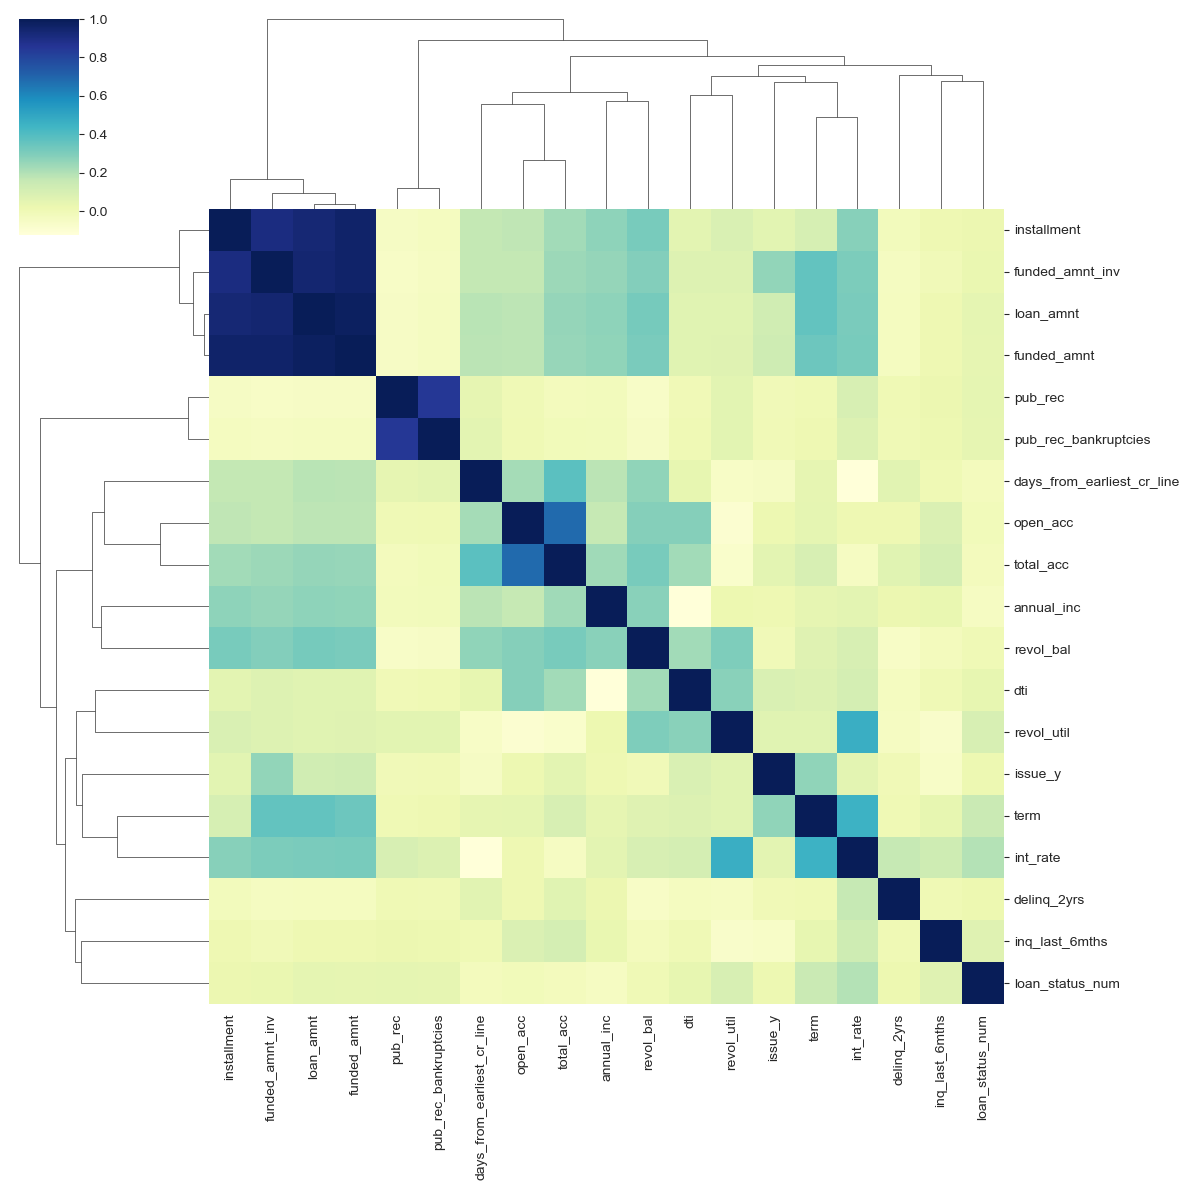

In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'int_rate' is a string and convert to float
loan['int_rate'] = loan['int_rate'].astype(str).str.rstrip('%').astype('float') / 100.0

# Ensure 'term' is a string and convert to int (number of months)
loan['term'] = loan['term'].astype(str).str.strip().str.split(' ').str[0].astype('int')

# Select only numeric columns for correlation
numeric_loan = loan.select_dtypes(include=[float, int])

# Calculate correlation matrix
corr_matrix = numeric_loan.corr()

# Plot the clustermap
sns.set_style("whitegrid")
sns.clustermap(data=corr_matrix, cmap='YlGnBu', figsize=(12, 12))
plt.show()

In [ ]:
# Since we know darker the value heigher the correlation , we can clearly see loan_amnt, funded_amnt, funded_amnt_inv 
# and installment have huge correlation
# These fields are proportional to each other. Next, the public records related fields pub_rec & pub_rec_bankrupcies 
# and number of accounts related fields open_acc & total_acc are correlated.

In [ ]:
# Loan status vs Numerical continuous variables

# Let us now compare the loan_status fields with all the numerical variable. 
# Since the analysis for this category will be similar, let us contruct a common function which can be used for all.

In [159]:
# here are some of the global settings/constants that will be referred to within the functions defined below
#colors = ["#fca9a9","#a9fea9"]
colors = ["#a9fea9","#fca9a9"]
sns.set(style='whitegrid', palette=sns.color_palette(colors))
by = 'loan_status'
order = ['Fully Paid','Charged Off']
# loan_status_pct from above will be used in the below functions as well

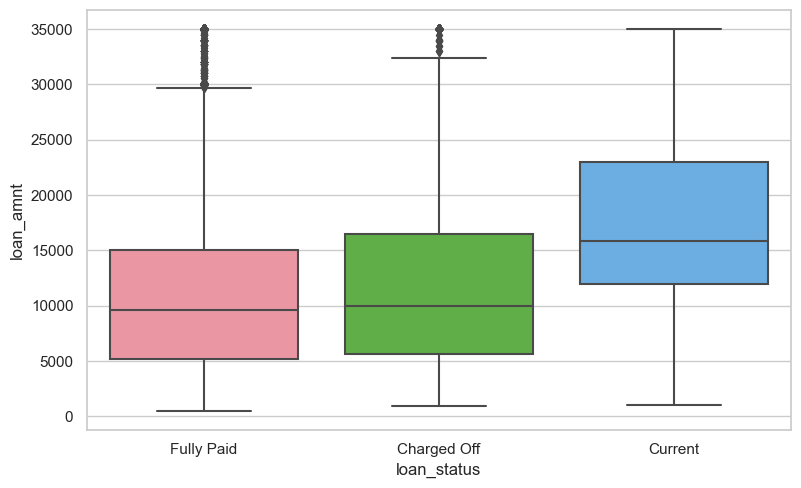

In [161]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan)
plt.show()

In [163]:
loan['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [ ]:
since we see there is huge difference between mean and median . let us limit our data to 75%

In [169]:
loan_till75 = loan.loc[(loan['loan_amnt']<=15000)]

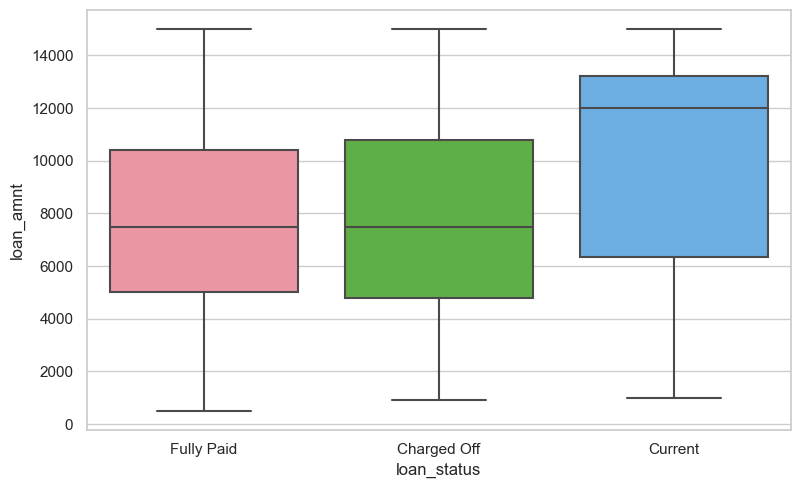

In [171]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan_till75)
plt.show()

In [ ]:
since it is giving picture , let us take date data above 75%

In [173]:
loan_above75 = loan.loc[(loan['loan_amnt']>=15000)]
loan_above75.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,m,y,issue_y,issue_m,days_from_earliest_cr_line,loan_status_num
20,20250,20250,19142.16108,60,0.000015,484.63,C,C4,Archdiocese of Galveston Houston,3 years,...,17813,85.6,22,0.0,Nov,97,11,Dec,9753,0
21,21000,21000,21000.00000,36,0.000012,701.73,B,B4,Osram Sylvania,10+ years,...,32135,90.3,38,0.0,Feb,83,11,Dec,15140,1
25,15000,15000,15000.00000,36,0.000010,483.38,B,B1,Winfield Pathology Consultants,2 years,...,13707,93.9,31,0.0,Feb,02,11,Dec,8200,0
26,15000,15000,8725.00000,36,0.000014,514.64,C,C2,nyc transit,9 years,...,5872,57.6,11,0.0,Oct,03,11,Dec,7593,1
31,31825,31825,31825.00000,36,0.000008,995.82,A,A4,Audubon Mutual Housing Corporation,5 years,...,23151,27.4,26,0.0,Nov,81,11,Dec,15597,0


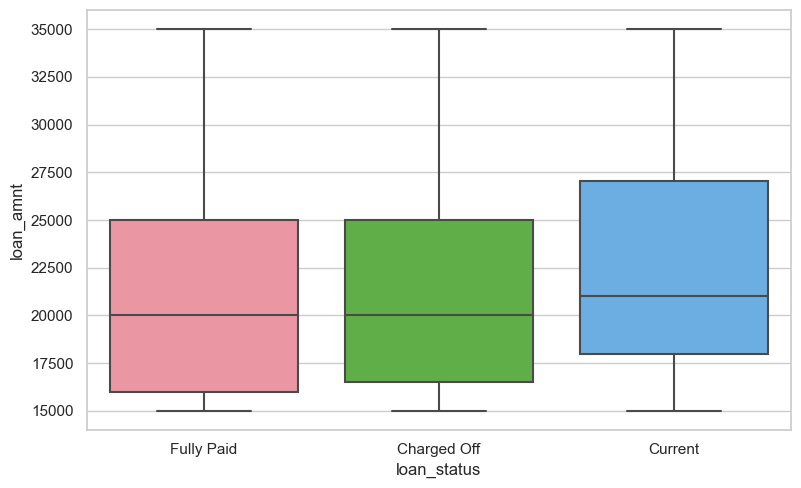

In [175]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan_above75)
plt.show()

In [ ]:
### from above box plot we can conclude that "heigher the amount" will tend to "Write off"

In [ ]:
since we have too many columns for univariate analysis let us define some default functions, so that we can re-use same function
for all the columns 

In [177]:
def PercentileCut (*, data=loan, column, trailer=''):
    """
        Parameters:
            data : defaulted to 'loan'
            column : this is the continuous numeric field which has to be binned to its percentiles
            trailer : defaulted to blank, this will be added to the end of the percentile values
                      like '%' for interest rate related fields
        Returns:
            None
            It creates a new column in the data with a suffix '_p' and this contains the newly created category
    """
    new_column = column + '_p'
    labels = ['Lowest ','Lower ','Medium ','Higher ','Highest ']
    labels = [labels[p] + '(' +
              str(round(np.nanpercentile(data[column], p * 20),2)) +
              trailer + ' - ' +
              str(round(np.nanpercentile(data[column], (p+1) * 20),2)) +
              trailer + ')'
              for p in range(5)]
    data[new_column] = pd.qcut(data[column], q=5, labels=labels)

In [179]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies', 'm', 'y', 'issue_y', 'issue_m',
       'days_from_earliest_cr_line', 'loan_status_num'],
      dtype='object')

In [181]:
def Univariate_Categorical (*, data=loan, column, title=None, figsize=(8,6), grp_comparison=True, box_plot=False,
                            pct_comparison=False, filter=None, disp_filter = None):
    """
        Parameters:
            data : defaulted at the 'loan' variable, but can be changed externally if needed
            column : need to provide the numerical column for comparison
            figsize : a default have is given, but can be overridden
            loan_status_pct : a global variable, which is referred here for the percentage comparison
            grp_comparison : with this as true, it groups the data based on the categories and compares
            pct_comparison : this will call the Pct_Comparison method and below couple parameters will be applicable for it
            filter : any conditions based on which the data will be filtered before plotting, ignored if None
            disp_filter : string for display purpose only, valid if filter is not None
        Returns:
            None, does a countplot and a box plot as well, if needed
    """
    plotdata = data if filter is None else data.loc[filter]
        
    if pct_comparison and filter is not None:
        Pct_Comparison(filter, disp_filter)

    if grp_comparison:
        fig, ax = plt.subplots(figsize=figsize)
        sns.countplot(data=plotdata, y=column, hue=by, ax=ax, 
                      order=plotdata[column].value_counts().index, hue_order=order)
        if title is not None:
            plt.title(title)
        plt.show()
        
        df = loan.groupby([column])[by].value_counts(normalize=True
                                                    ).rename('Charged off %').reset_index().sort_values(column)
        df = df.loc[df[by]=='Charged Off'].sort_values(by='Charged off %', ascending=False).drop(columns=[by])
        df2 = loan.groupby([column])[by].count()
        df = df.merge(right=df2,on=column).rename(columns={by:'Record count'})
        display(HTML(df.to_html(index=False)))
        
        if box_plot:
            df2.plot(kind='box',logy=True,x="No. of records of defaulted loans per category")
            plt.show()        

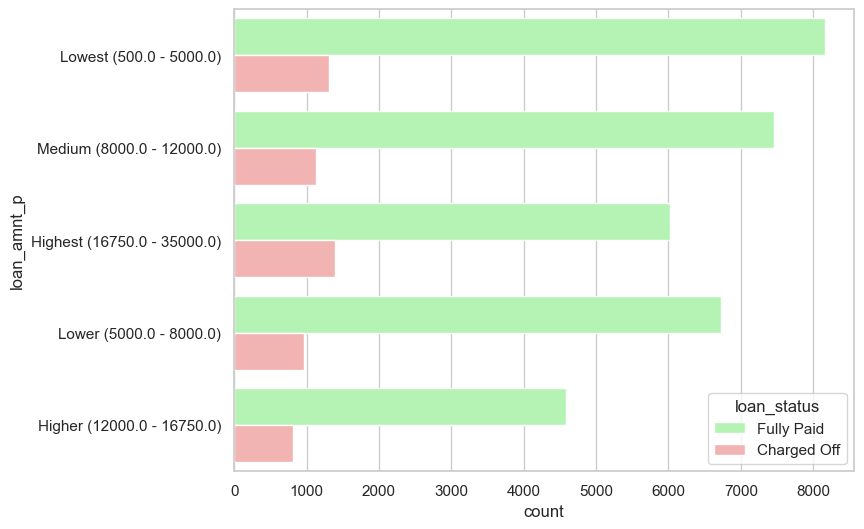

loan_amnt_p,Charged off %,Record count
Highest (16750.0 - 35000.0),0.175706,7928
Higher (12000.0 - 16750.0),0.144495,5668
Lowest (500.0 - 5000.0),0.137333,9568
Medium (8000.0 - 12000.0),0.129621,8764
Lower (5000.0 - 8000.0),0.123893,7789


In [183]:
PercentileCut(column='loan_amnt')
Univariate_Categorical(column='loan_amnt_p')

In [ ]:
Higher the loan amount, greater the chance of the loan getting default.

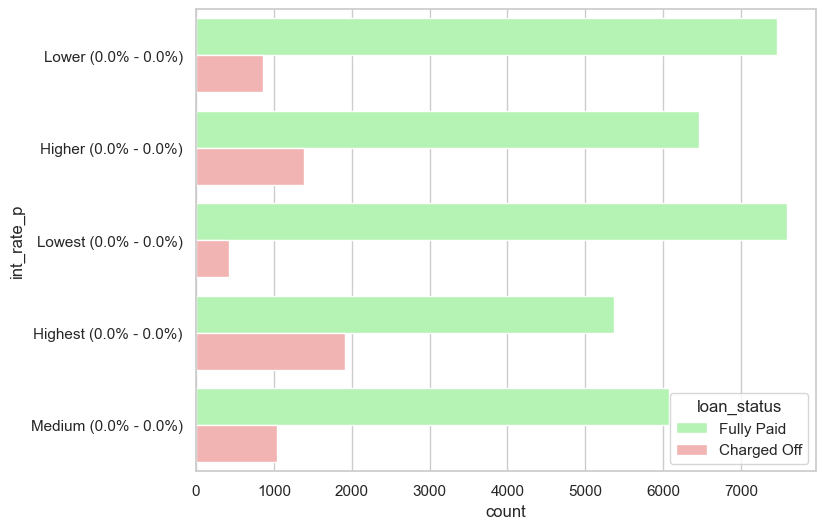

int_rate_p,Charged off %,Record count
Highest (0.0% - 0.0%),0.246085,7790
Higher (0.0% - 0.0%),0.170765,8093
Medium (0.0% - 0.0%),0.142351,7334
Lower (0.0% - 0.0%),0.100921,8472
Lowest (0.0% - 0.0%),0.053438,8028


In [185]:
PercentileCut(column='int_rate', trailer='%')
Univariate_Categorical(column='int_rate_p')

In [189]:
## Higher the interest rate leads to higher charged off%

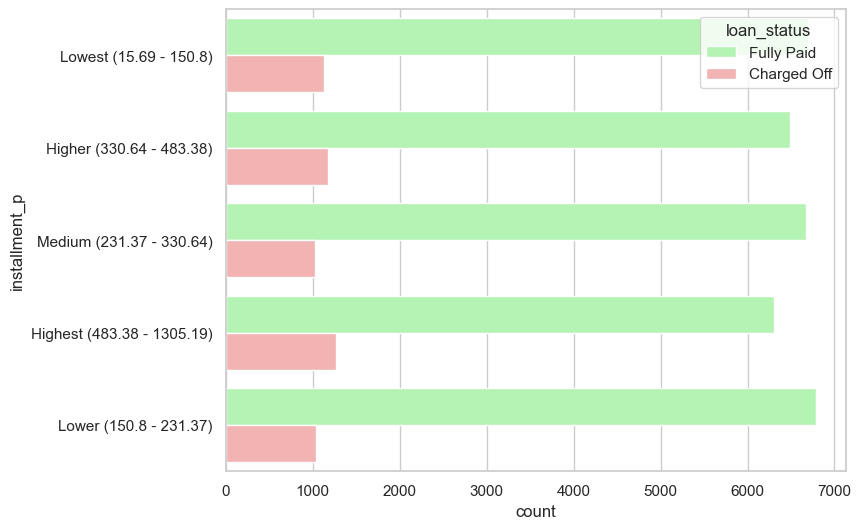

installment_p,Charged off %,Record count
Highest (483.38 - 1305.19),0.159254,7937
Higher (330.64 - 483.38),0.147547,7950
Lowest (15.69 - 150.8),0.141888,7957
Lower (150.8 - 231.37),0.130374,7931
Medium (231.37 - 330.64),0.129313,7942


In [191]:
PercentileCut(column='installment')
Univariate_Categorical(column='installment_p')

In [193]:
# Above data and plot shows that higher installment amounts shows higher default percentages.

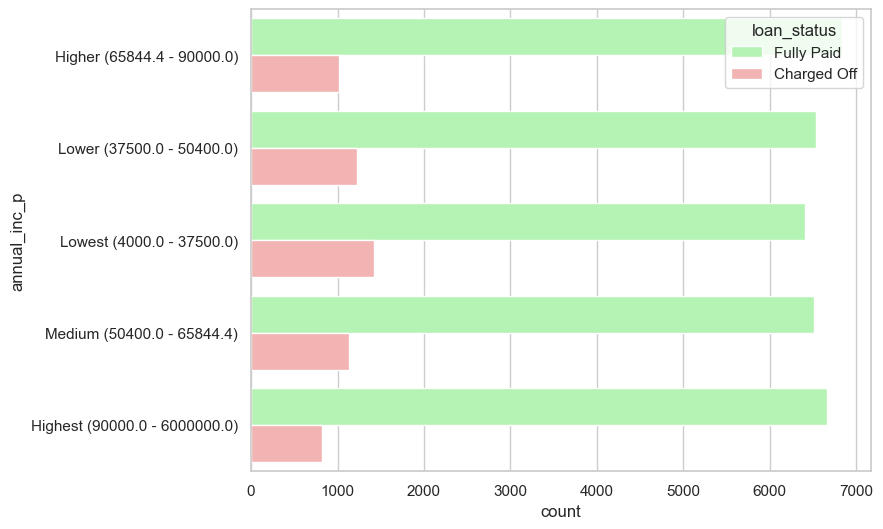

annual_inc_p,Charged off %,Record count
Lowest (4000.0 - 37500.0),0.178692,7969
Lower (37500.0 - 50400.0),0.153875,7987
Medium (50400.0 - 65844.4),0.144145,7874
Higher (65844.4 - 90000.0),0.125553,8132
Highest (90000.0 - 6000000.0),0.105480,7755


In [195]:
PercentileCut(column='annual_inc')
Univariate_Categorical(column='annual_inc_p')

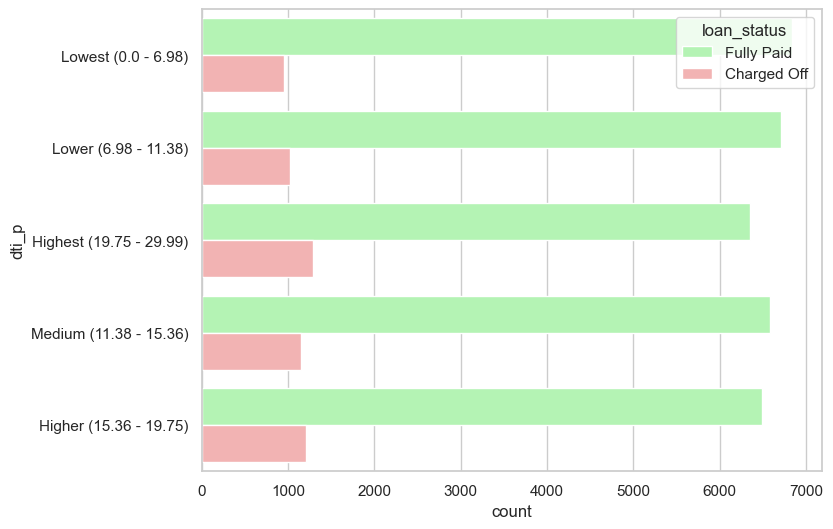

dti_p,Charged off %,Record count
Highest (19.75 - 29.99),0.162679,7942
Higher (15.36 - 19.75),0.152508,7934
Medium (11.38 - 15.36),0.144818,7941
Lower (6.98 - 11.38),0.128492,7946
Lowest (0.0 - 6.98),0.119940,7954


In [197]:
PercentileCut(column='dti')
Univariate_Categorical(column='dti_p')

In [199]:
# higher DTI ( debt to income ratio) will lead to higher charged off %

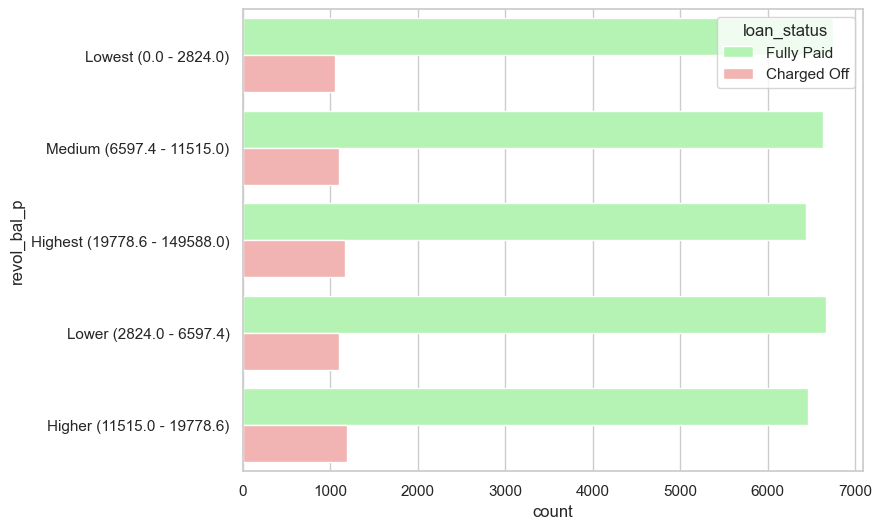

revol_bal_p,Charged off %,Record count
Higher (11515.0 - 19778.6),0.149584,7942
Highest (19778.6 - 149588.0),0.147784,7944
Medium (6597.4 - 11515.0),0.139099,7944
Lower (2824.0 - 6597.4),0.138630,7942
Lowest (0.0 - 2824.0),0.133291,7945


In [201]:
PercentileCut(column='revol_bal')
Univariate_Categorical(column='revol_bal_p')

In [205]:
# This shows the total credit revolving balances slightly influence the default percentage. 
# Higher the revolving balance, bigger the chance of the loan getting defaulted.

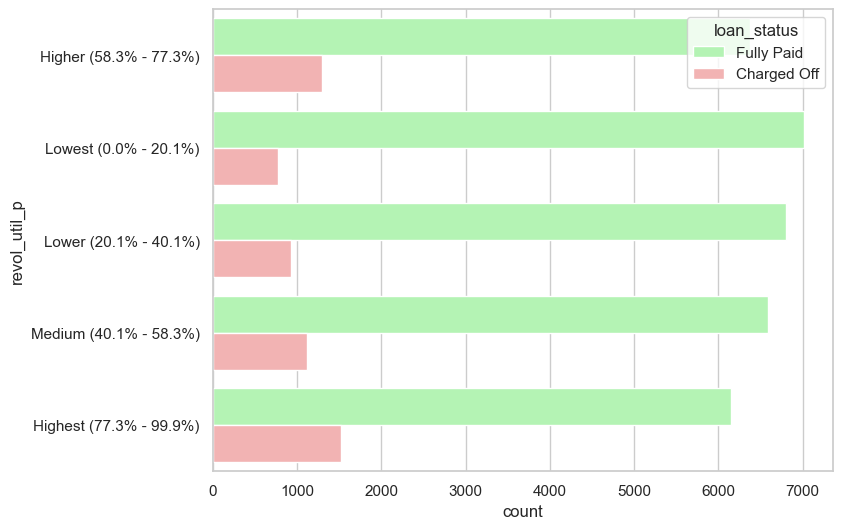

revol_util_p,Charged off %,Record count
Highest (77.3% - 99.9%),0.191739,7917
Higher (58.3% - 77.3%),0.162155,7943
Medium (40.1% - 58.3%),0.140245,7929
Lower (20.1% - 40.1%),0.116010,7939
Lowest (0.0% - 20.1%),0.097241,7939


In [207]:
PercentileCut(column='revol_util',trailer='%')
Univariate_Categorical(column='revol_util_p')

In [211]:
# This data shows that the revolving line utilization rate has a large impact to the default percentage. 
# When this increases, the charged off percentage rises.

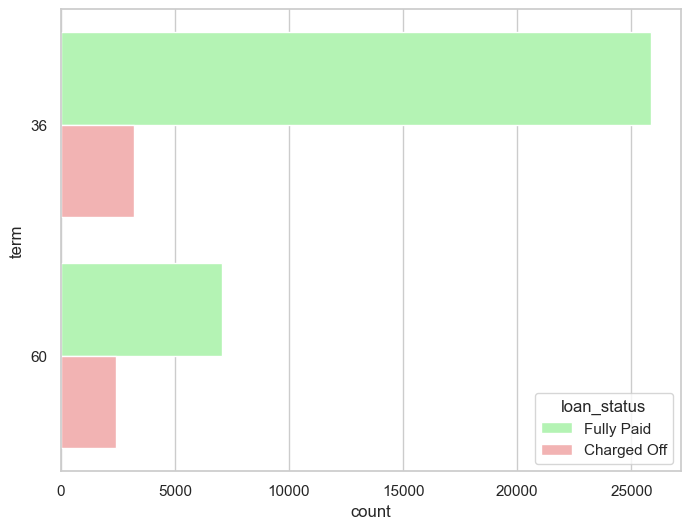

term,Charged off %,Record count
60,0.225967,10621
36,0.110909,29096


In [213]:
Univariate_Categorical(column='term')

In [ ]:
For loans with 5 year repayment term, the default percent is 25%. 
And for 3 year loan repayment term, the default is only for 11% of the cases. 
Therefore, loan repayment term plays a factor in judging the default rate.

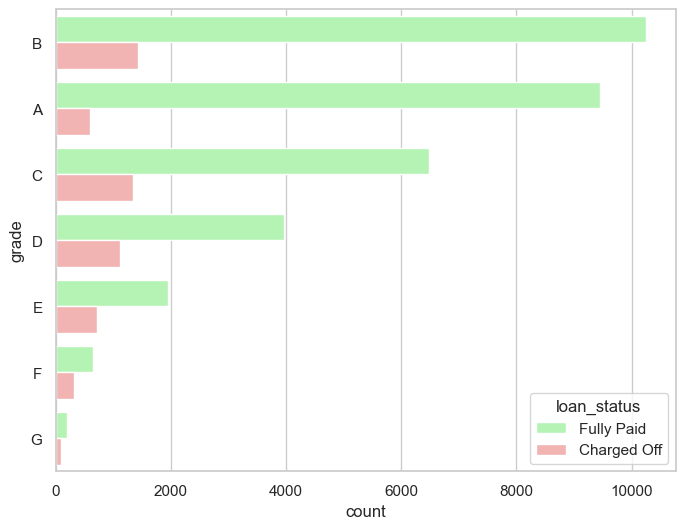

grade,Charged off %,Record count
G,0.319620,316
F,0.304099,1049
E,0.251583,2842
D,0.210665,5307
C,0.166337,8098
B,0.118552,12020
A,0.059693,10085


In [215]:
Univariate_Categorical(column='grade')

In [217]:
# We can clearly see that loan grades having highest default percentages. G, F, E and D 
# form grades where default rate is much higher than others.

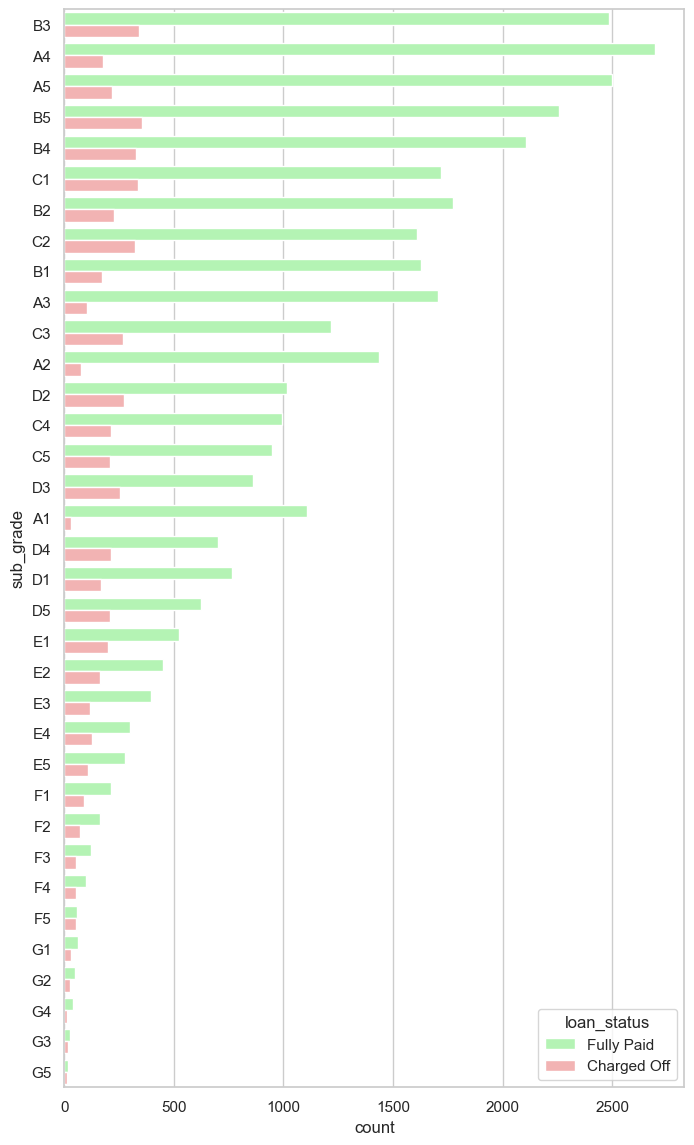

sub_grade,Charged off %,Record count
F5,0.457627,118
G3,0.395833,48
G2,0.358974,78
G5,0.333333,30
F4,0.315476,168
G1,0.298077,104
F2,0.281124,249
E4,0.277533,454
F1,0.276596,329
F3,0.275676,185


In [219]:
Univariate_Categorical(column='sub_grade', figsize=(8,14))

In [221]:
# The above table shows the loan sub-grade versus the default percentage. 
# The G3 and F5 sub categories have above 40% default rate. This field is a clear indicator of the default percent.

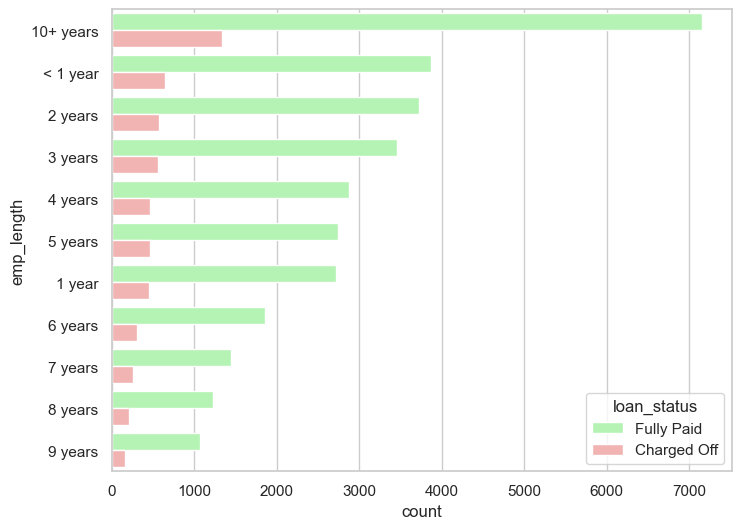

emp_length,Charged off %,Record count
10+ years,0.149904,8879
7 years,0.148336,1773
1 year,0.140741,3240
5 years,0.139549,3282
< 1 year,0.139428,4583
6 years,0.137730,2229
8 years,0.137255,1479
3 years,0.135531,4095
4 years,0.134459,3436
2 years,0.129216,4388


In [223]:
Univariate_Categorical(column='emp_length')

In [225]:
# although there is nothing much to conclude from above data, we can see having no employment will lead to Defaulted payment

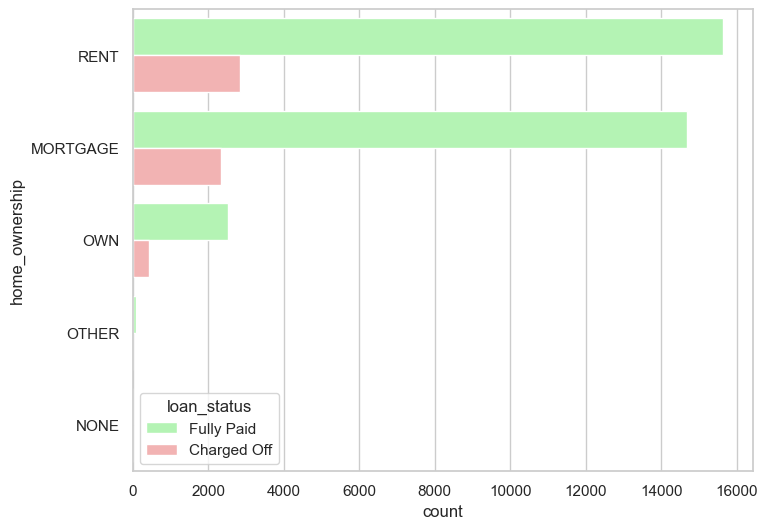

home_ownership,Charged off %,Record count
OTHER,0.183673,98
RENT,0.150220,18899
OWN,0.144866,3058
MORTGAGE,0.131774,17659


In [227]:
Univariate_Categorical(column='home_ownership')

In [229]:
# we have not much info to conclude as it says "OTHER", 

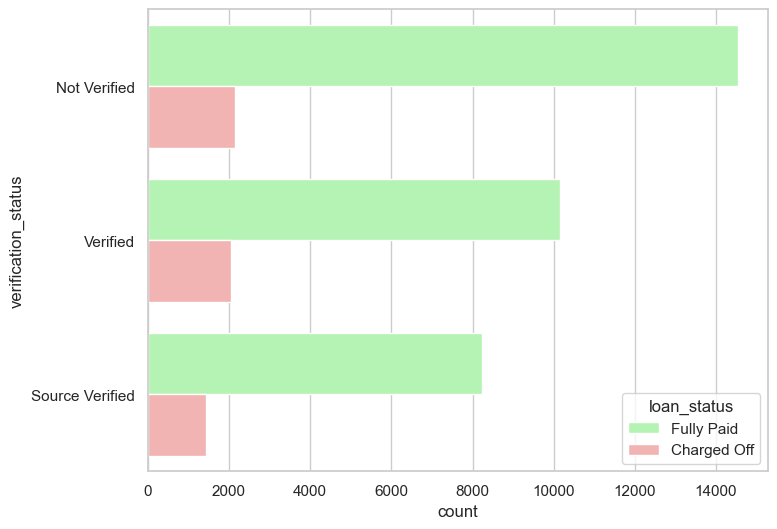

verification_status,Charged off %,Record count
Verified,0.160122,12809
Source Verified,0.143587,9987
Not Verified,0.126588,16921


In [231]:
Univariate_Categorical(column='verification_status')

In [233]:
# interestingly verified applicants have more defaulted % which means the verifiaction process is not correct.

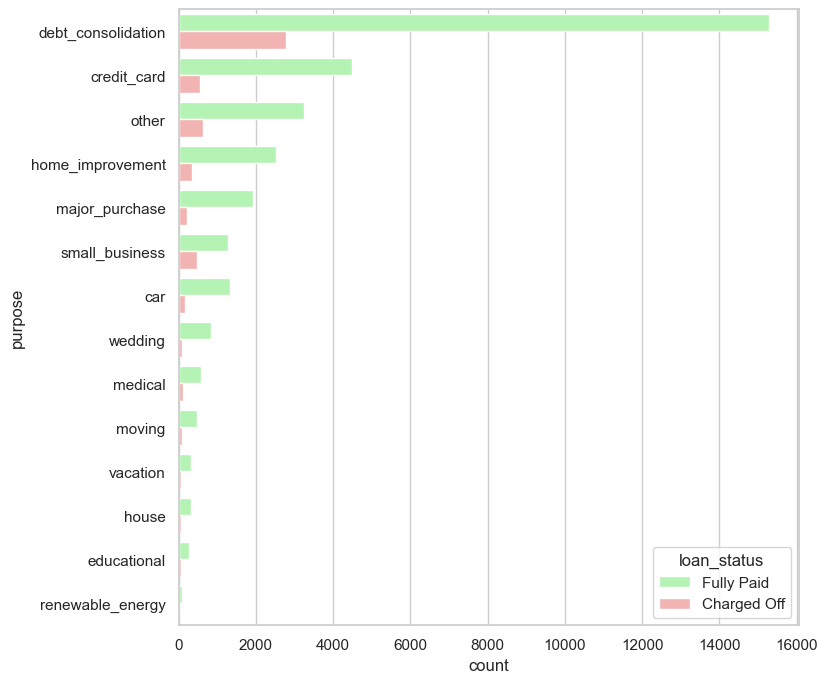

purpose,Charged off %,Record count
small_business,0.259847,1828
renewable_energy,0.184466,103
educational,0.172308,325
other,0.158527,3993
moving,0.157804,583
house,0.154856,381
medical,0.152958,693
debt_consolidation,0.148436,18641
vacation,0.139108,381
home_improvement,0.116599,2976


In [235]:
Univariate_Categorical(column='purpose', figsize=(8,8))

In [237]:
# From the above analysis it is evidend that the loans taken for small_business, renewable_energy and educational are the riskier ones.

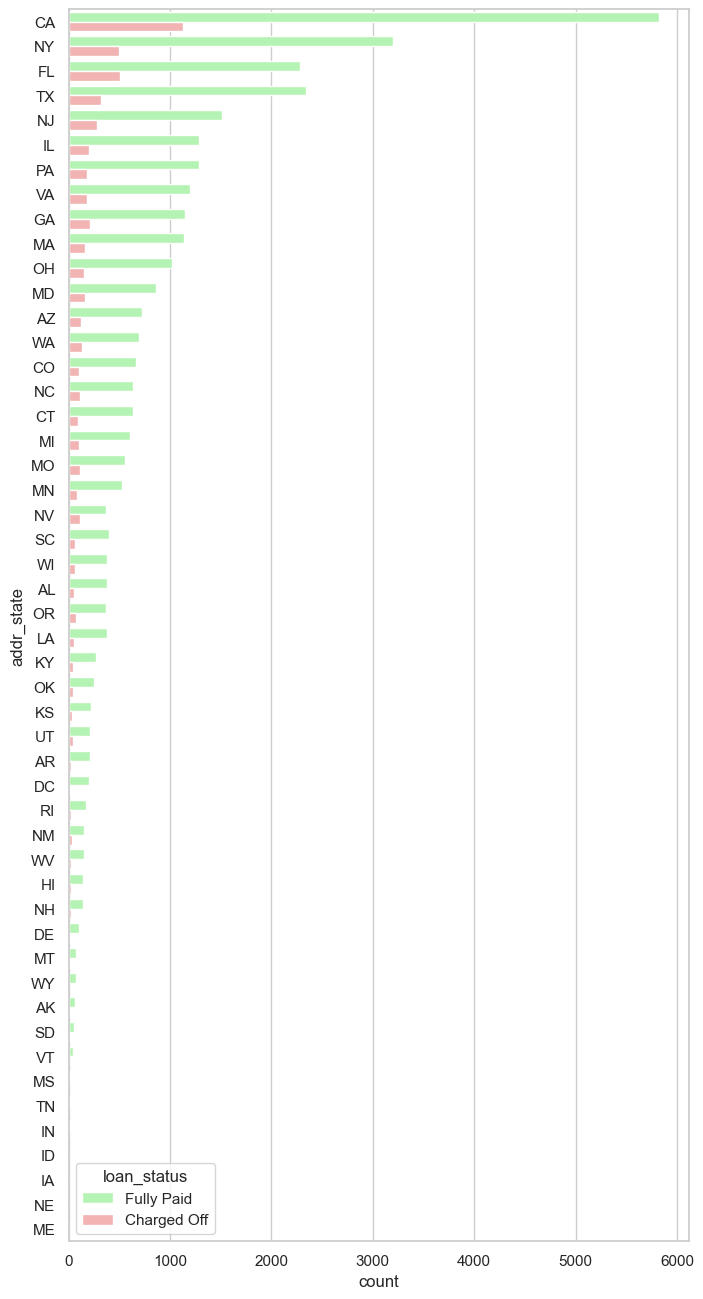

addr_state,Charged off %,Record count
NE,0.600000,5
NV,0.217304,497
SD,0.187500,64
AK,0.187500,80
FL,0.175855,2866
ID,0.166667,6
MO,0.166181,686
HI,0.160920,174
NM,0.158730,189
CA,0.158473,7099


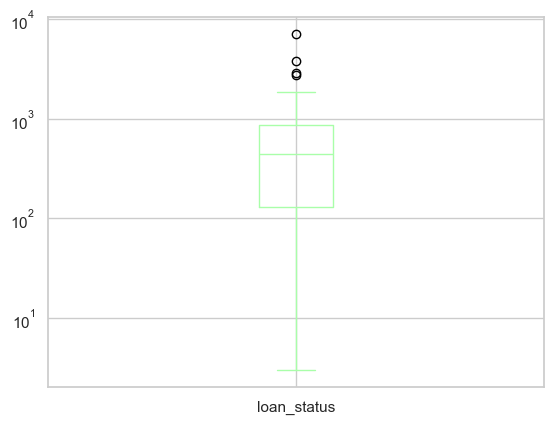

In [239]:
Univariate_Categorical(column='addr_state',figsize=(8,16), box_plot=True)

In [241]:
# From the above table we can see that the some of the risky states are NE, NV, SD, AK, FL, MO

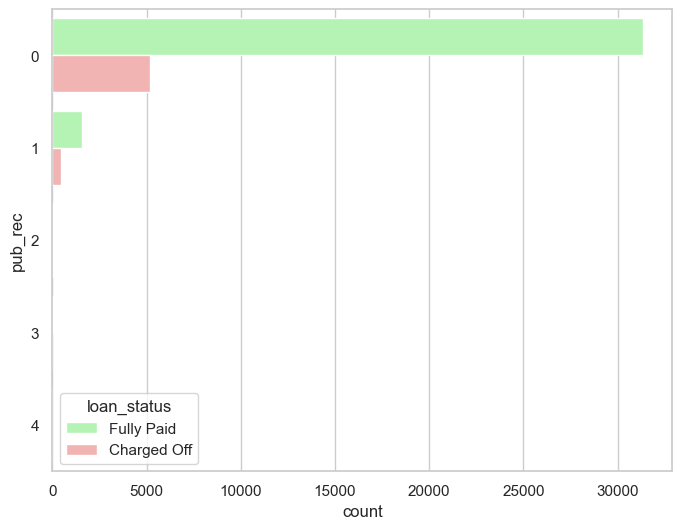

pub_rec,Charged off %,Record count
1,0.222276,2056
2,0.196078,51
0,0.137230,37601


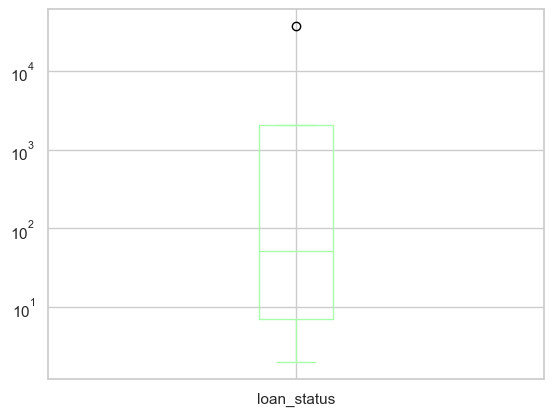

In [243]:
Univariate_Categorical(column='pub_rec', box_plot=True)

In [245]:
# Above data and graph crealy shows that individuals with non-zero derogatory public records have higher chances of charged off

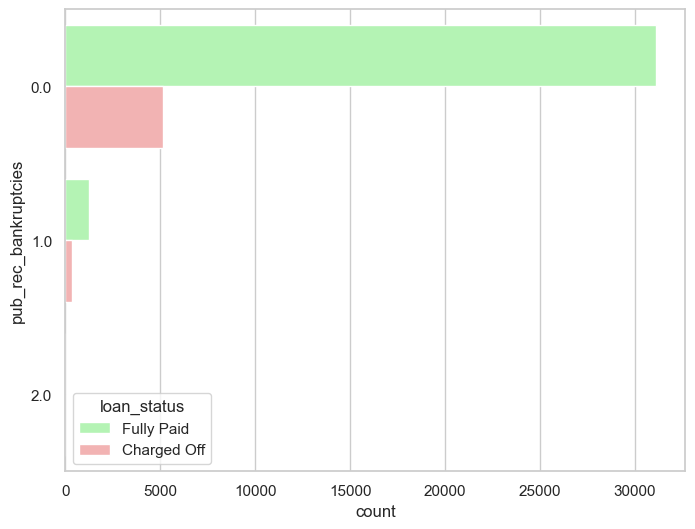

pub_rec_bankruptcies,Charged off %,Record count
2.0,0.285714,7
1.0,0.218638,1674
0.0,0.137684,37339


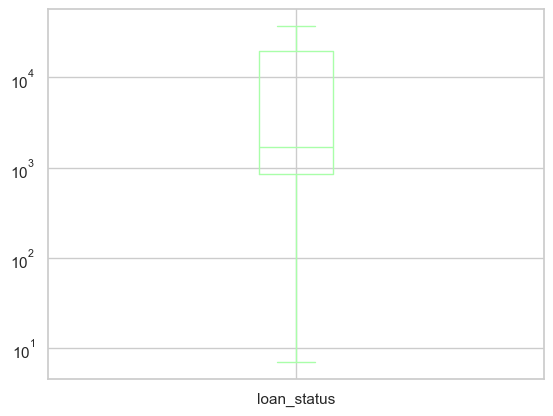

In [247]:
Univariate_Categorical(column='pub_rec_bankruptcies', box_plot=True)

In [249]:
# Higher the number of public bankruptcy records, bigger the chance of defaulting the loan.

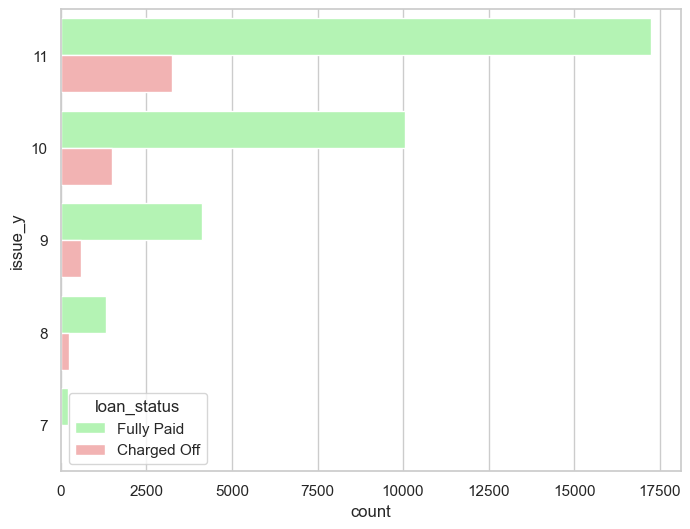

issue_y,Charged off %,Record count
7,0.179283,251
8,0.158131,1562
11,0.150351,21656
10,0.128772,11532
9,0.125954,4716


In [251]:
Univariate_Categorical(column='issue_y')

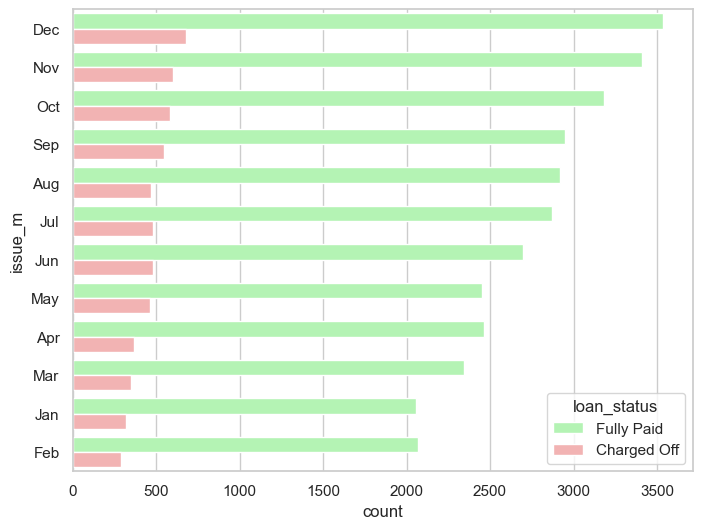

issue_m,Charged off %,Record count
May,0.155385,2999
Dec,0.152944,4433
Sep,0.149945,3648
Oct,0.147433,3934
Jun,0.147301,3279
Nov,0.143509,4167
Jul,0.137802,3476
Jan,0.134931,2379
Aug,0.133030,3518
Apr,0.130558,2834


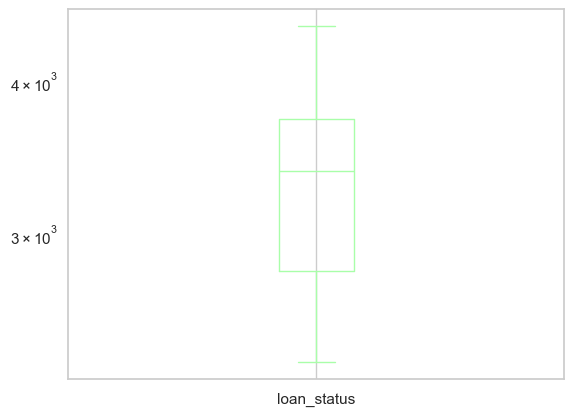

In [253]:
Univariate_Categorical(column='issue_m', box_plot=True)

In [255]:
#we can clearly see December is the month which has the highest number of loan applications per year 
#and also have the biggest default ratio. May be people take loan for travel/party during Christmas and then are not able to pay back. 
#Month of May is also another one,                                                                                                                                 
#which is during the summer break and right before the Memorial day and Independance day breaks in US where people love to travel.

In [ ]:
# Bivariate Analysis

# Now that we have analyzed each of the variables and its impact on the loan-status, 
# let us take group of variables together and and analyze their combined effect on the loan-status. 
# These categories are based on our business understanding. 
# The original distribution column shows the average trend in all the data and we compare that with the data after applying our conditions.

In [257]:
def Bivariate_Analysis (*, data=loan, x, y, title=None, figsize=(8,6)):
    """
        Parameters:
            data : defaulted at the 'loan' variable, but can be changed externally if needed
            x, y : columns of data in the corresponding axis, one numerical and one categorical
            figsize : a default have is given, but can be overridden
        Returns:
            None, does a violin plot
    """
    fig, ax = plt.subplots(figsize=figsize)
    sns.violinplot(data=data, x=x, y=y, hue=by, split=True, figsize=figsize,
                   ax=ax, hue_order=order)
    if title is not None:
        plt.title(title)
    plt.show()

In [259]:
def Bivariate_Categorical (*, data=loan, x, y, title=None, figsize=(8,6)):
    """
        Parameters:
            data : defaulted at the 'loan' variable, but can be changed externally if needed
            x, y : columns of data in the corresponding axis, both categorical
            figsize : a default have is given, but can be overridden
        Returns:
            None, does a heatmap plot
    """
    fig, ax = plt.subplots(figsize=figsize)
    pt = pd.pivot_table(data=data, values='loan_status_num', index=y, columns=x)
    sns.heatmap(pt, ax=ax, cmap='YlGnBu')
    if title is not None:
        plt.title(title)
    plt.show()

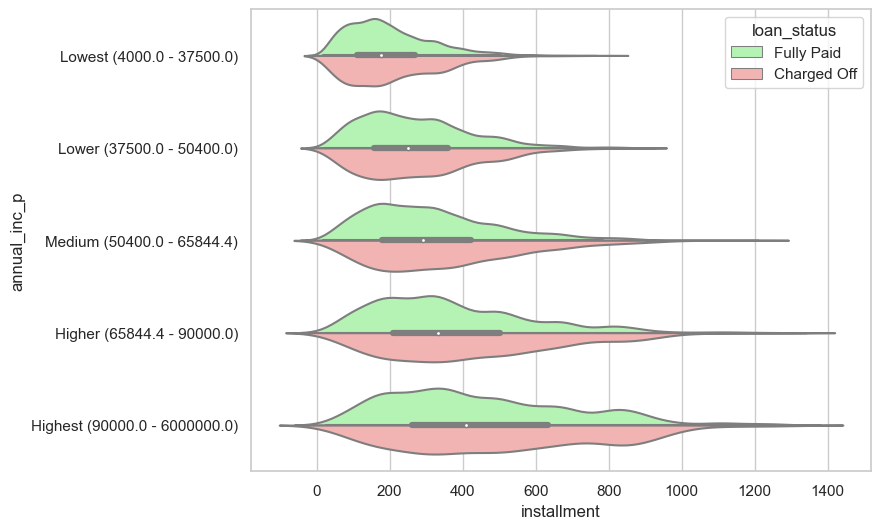

In [261]:
Bivariate_Analysis(x='installment', y='annual_inc_p')
plt.show()

In [263]:
# Above figure shows that for higher installments for any income group have more number of defaults.

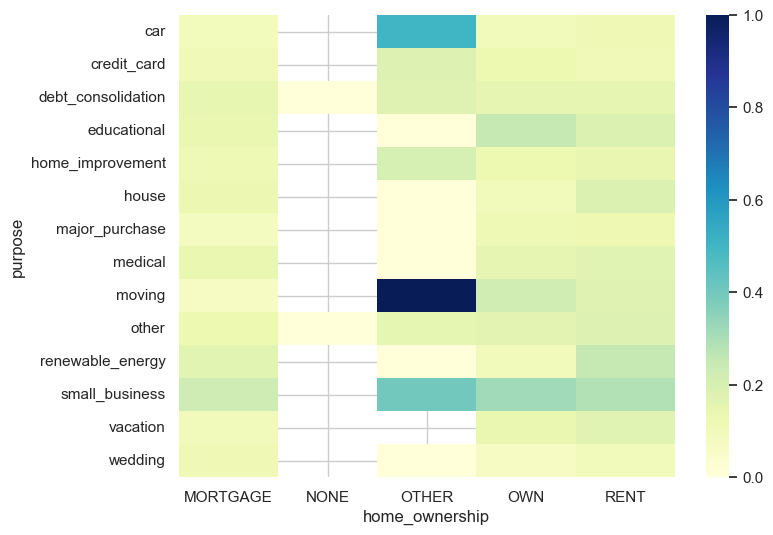

In [265]:
Bivariate_Categorical(x='home_ownership', y='purpose')

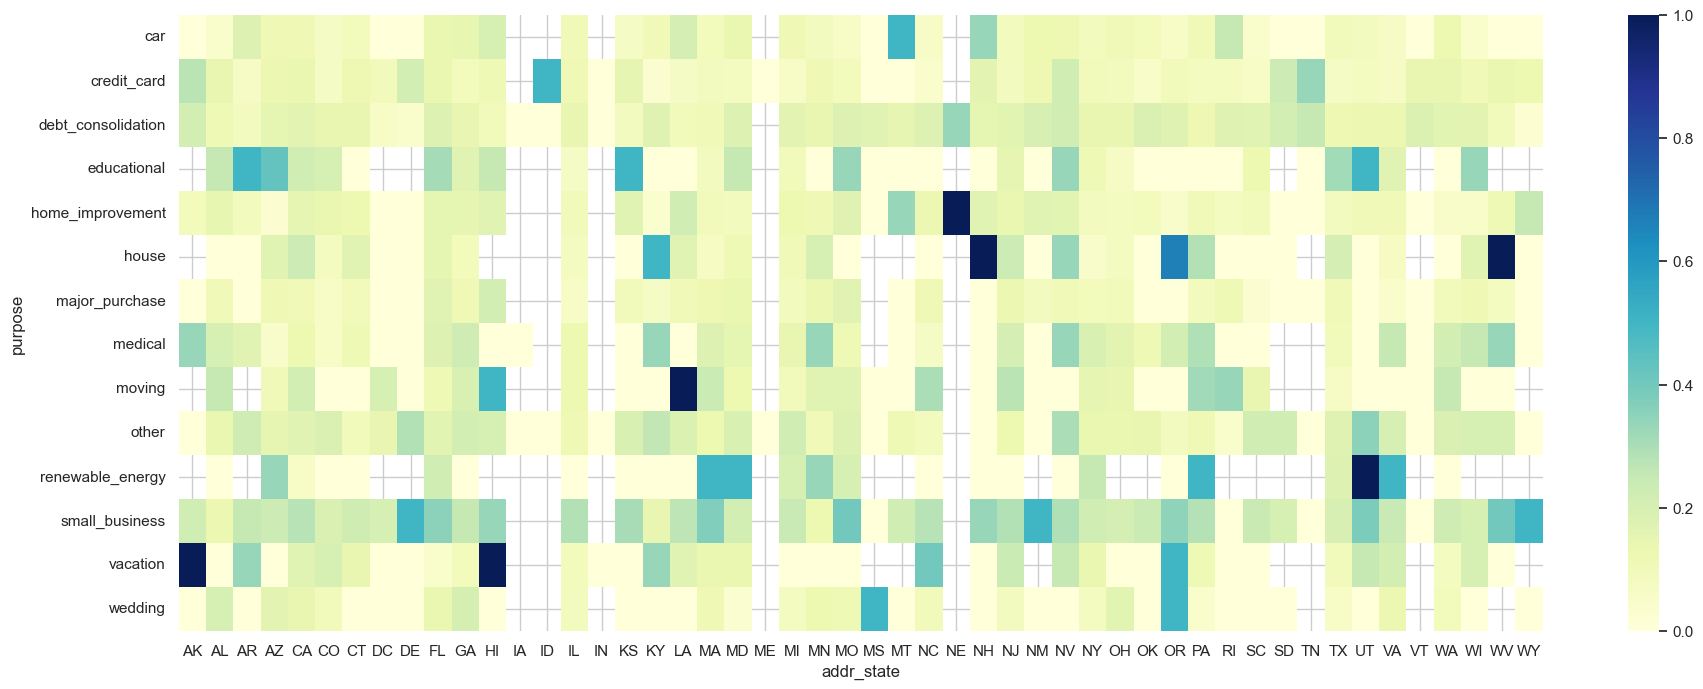

In [267]:
Bivariate_Categorical(x='addr_state', y='purpose', figsize=(22,8))

In [ ]:
As per the above plot, the darker the intersection of addr_state has with the purpose of the loan, the risker the loan application is. 
Some of the examples are below:
•vacation loans in AK, HI, OR
•education loans in AR, KS, UT
•small business loans in DE, NM, WV, wY
•wedding loans in MS, OR

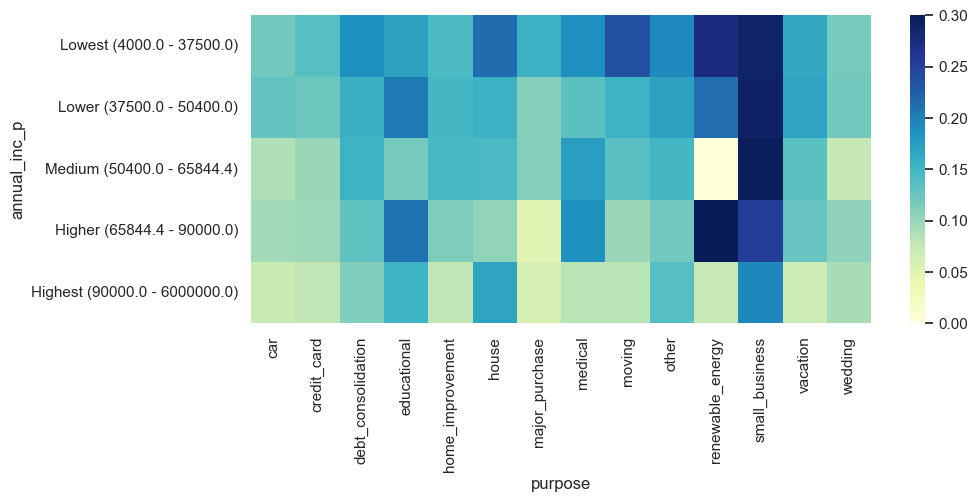

In [269]:
Bivariate_Categorical(x='purpose', y='annual_inc_p', figsize=(10,4))

In [ ]:
# Plot of various income groups versus the risky purposes of loans for them. 
Some examples are:
•small business loans for lowest and medium income groups
•renewable energy loans for higher income group

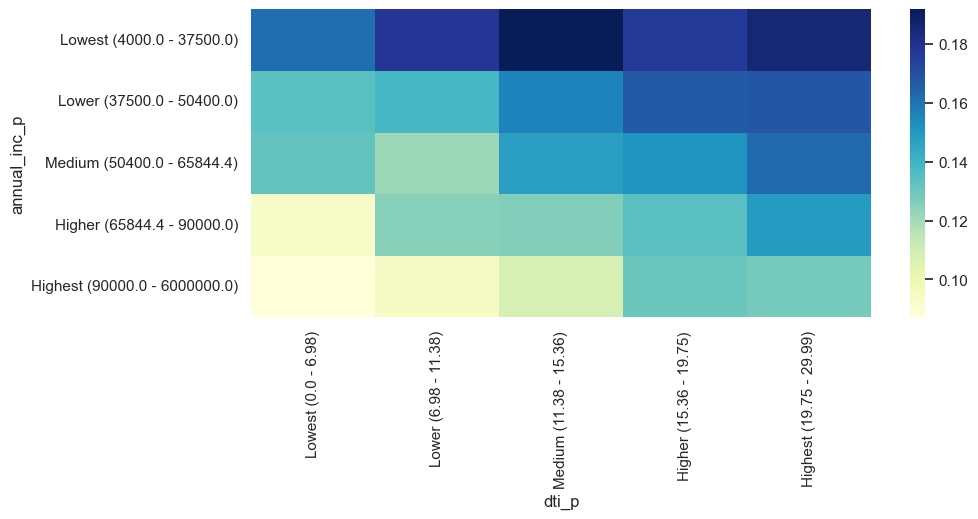

In [271]:
Bivariate_Categorical(x='dti_p', y='annual_inc_p', figsize=(10,4))

In [ ]:
Medium debt-to-income group in the lowest income range is the most risky when it comes to loan repayment.

In [273]:
 Hereby we come to an end of the EDA of the loan data set and finding some of the drivers for loan default. 
Apart from the ones highlighted below, I am sure there will be multiple others too; 
however, according to me, these are the most impactful ones.

<b>Minor Impact</b> <br>
.Higher loan amount (above 16K) <br>
•Higher installment amount (above 327) <br>
•Lower annual income (below 37K)<br> 
•Higher debt to income ratio (above 15%) <br>
•Applicant’s address state (NV, SD, AK, FL, etc.) <br>
•Loan issue month (Dec, May, Sep)<br>

<b>Heavy impact</b> <br>
•Higher interest rate (above 13%) <br>
•Higher revolving line utilization rate (above 58%) <br>
•Repayment term (5 years)<br> 
•Loan grade & sub-grade (D to G) <br>
•Missing employment record<br> 
•Loan purpose (small business, renewable energy, educational) <br>
•Derogatory public records (1 or 2) <br>
•Public bankruptcy records (1 or 2)<br>

<b>Combined impact</b> <br>
•High loan amount & interest rate for lower income group <br>
•High installment and longer repayment term <br>
•Home ownership (other) and loan purpose (car, moving or small business) <br>
•Residential state and loan purpose<br> 
•Income group and loan purpose<br>

SyntaxError: invalid decimal literal (4134821042.py, line 6)